In [3]:
from vina import Vina

### First part of attempt with vina package for one single docking

In [9]:
v = Vina(sf_name='vina')
v.set_receptor('p53.pdbqt')


In [10]:
v.set_ligand_from_file('pdbqt/EGCG.pdbqt')


In [11]:
v.compute_vina_maps(center=[30,30,30,], box_size=[100,100,100])


In [12]:
# Score the current pose
energy = v.score()
print('Score before minimization: %.3f (1kcal/mol)' % energy[0])

Score before minimization: 0.000 (kcal/mol)


In [13]:
# Minimized locally the current pose0
energy_minimized = v.optimize()
print('Score after minimization : %.3f (kcal/mol)' % energy_minimized[0])
v.write_pose('p53_EGCG_minimized.pdbqt', overwrite=True)

# Dock the ligand
v.dock(exhaustiveness=520, n_poses=100)
v.write_poses('p53_EGCG_vina_out.pdbqt', n_poses=5, overwrite=True)

Score after minimization : 0.000 (kcal/mol)


In [ ]:
v = Vina(sf_name='vina')
v.set_receptor('protein/p53_1.pdbqt')
v.set_ligand_from_file('pdbqt/EGCG.pdbqt')

v.compute_vina_maps(center=[50,50,50], box_size=[100,100,100])
# Score the current pose
energy = v.score()
print('Score before minimization: %.3f (kcal/mol)' % energy[0])

# Minimized locally the current pose
energy_minimized = v.optimize()
print('Score after minimization : %.3f (kcal/mol)' % energy_minimized[0])
v.write_pose('p53_EGCG_minimized.pdbqt', overwrite=True)

# Dock the ligand
v.dock(exhaustiveness=320, n_poses=200)
v.write_poses('p53_EGCG_vina_out.pdbqt', n_poses=5, overwrite=True)

### Also did this for 10 frames of AR trajectories

In [ ]:
for i in range(1,10):
    v = Vina(sf_name='vina')
    v.set_receptor('AR_protein/' + str(i) + '.pdbqt')
    v.set_ligand_from_file('pdbqt/E7.pdbqt')
    v.compute_vina_maps(center=[30,30,30], box_size=[100,100,100])
    
    # Score the current pose    
    energy = v.score()
    print('Score before minimization: %.3f (kcal/mol)' % energy[0])
    
    # Minimized locally the current pose
    energy_minimized = v.optimize()
    print('Score after minimization : %.3f (kcal/mol)' % energy_minimized[0])
    v.write_pose('AR_E7_out/minimized_' + str(i) + '.pdbqt', overwrite=True)

    # Dock the ligand
    v.dock(exhaustiveness=160, n_poses=100)
    v.write_poses('AR_E7_out/vina_out_' + str(i) + '.pdbqt', n_poses=5, overwrite=True)

    # !babel -pdbqt 'autodock_out/p53_EGCG_vina_out_' + str(i) + '.pdbqt' -opdb 'autodock_out/p53_EGCG_vina_out_' + str(i) + '.pdb'


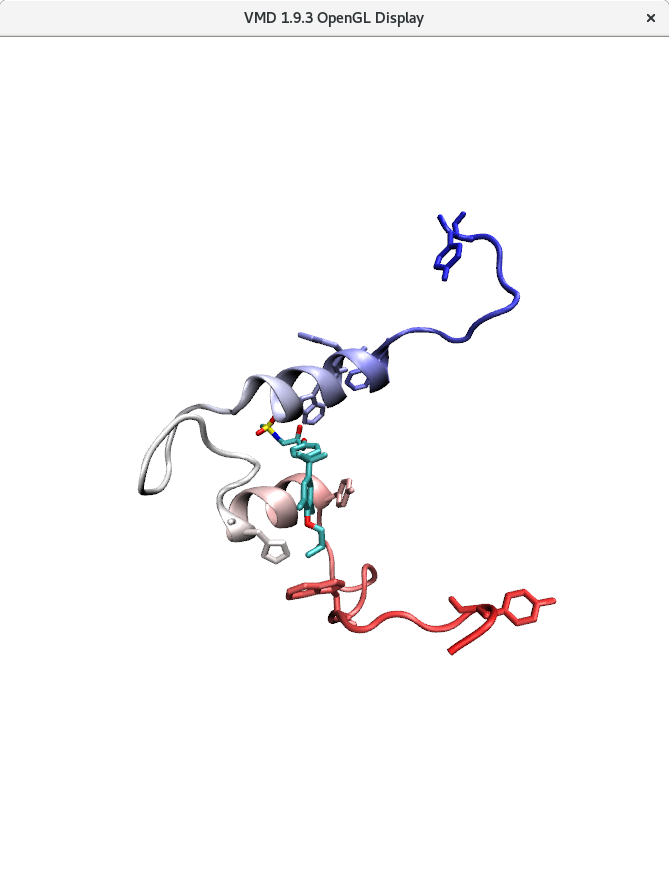

In [2]:
# Some snapshots attached here
from IPython.display import Image
Image(filename='AR_E7_out/1.png')

### Second part: try to specify binding pocket of one frame in AR trajectory with EPI-7170

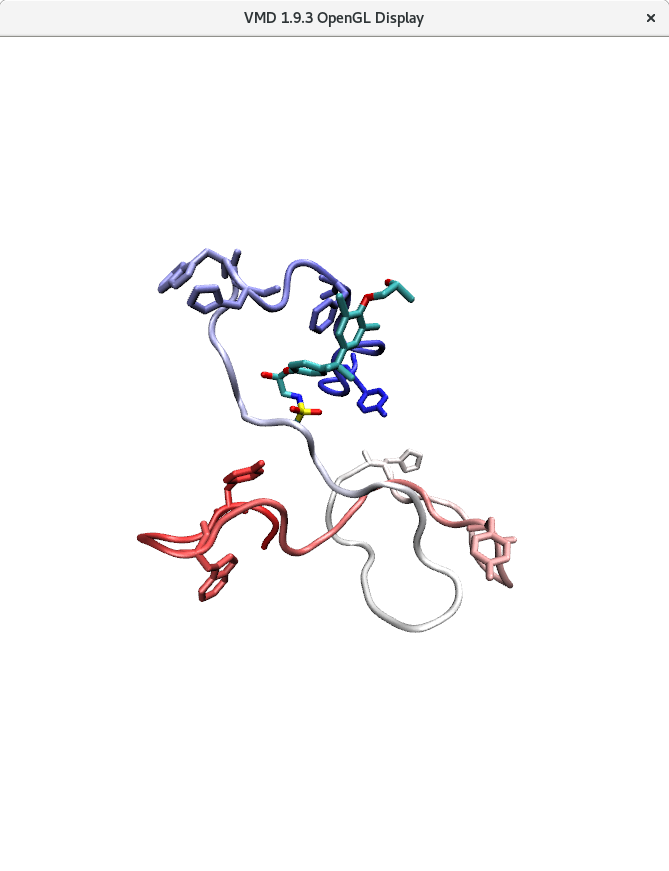

In [3]:
Image(filename='AR_E7_out/2.png')

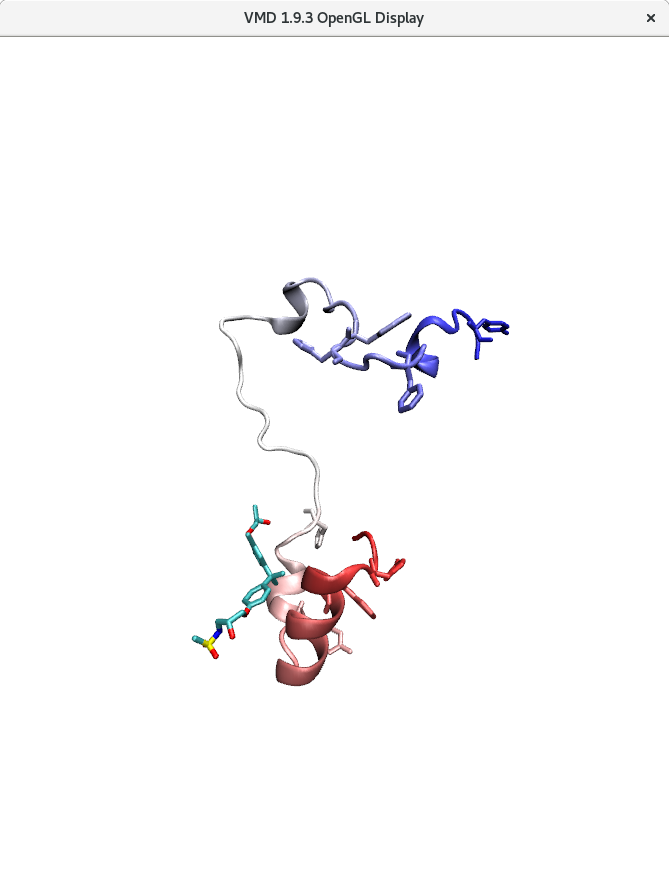

In [4]:
Image(filename='AR_E7_out/3.png')

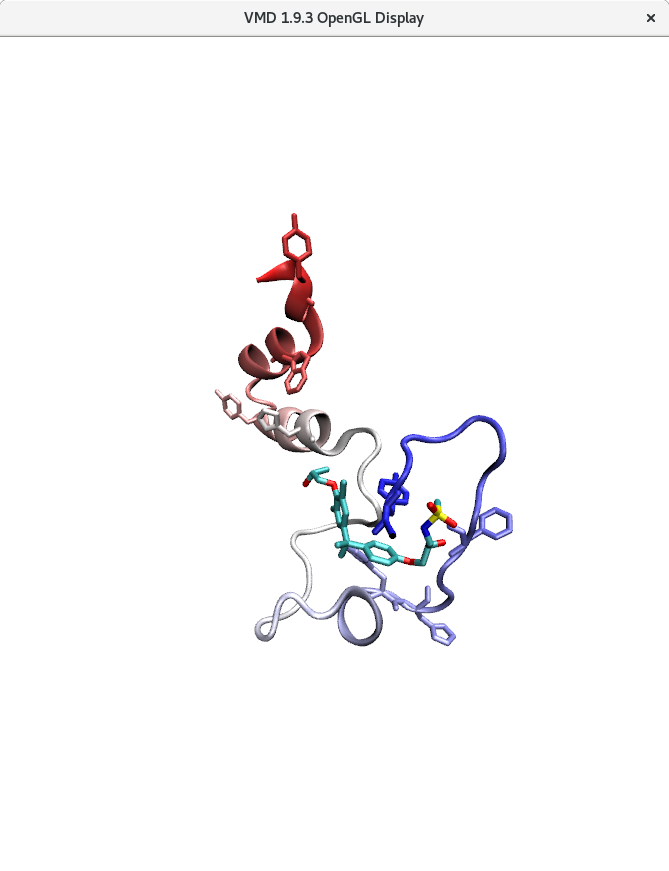

In [5]:
Image(filename='AR_E7_out/4.png')

In [61]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

In [13]:
ProteinPdb = md.load('vina_test/protein.pdb')
ProteinTop = ProteinPdb.topology
CA_xyz = []
for resi in ProteinTop.select('name CA'):
    a = ProteinPdb.xyz[0,resi,:]*10
    a = a.tolist()
    CA_xyz.append(a)
CA_xyz   
    

[[40.61000061035156, 32.06999969482422, 17.690000534057617],
 [42.25, 35.540000915527344, 17.56999969482422],
 [39.400001525878906, 37.68000030517578, 18.860000610351562],
 [37.060001373291016, 34.73999786376953, 19.56999969482422],
 [36.709999084472656, 32.5, 22.639999389648438],
 [36.290000915527344, 28.84000015258789, 23.43000030517578],
 [33.650001525878906, 29.579999923706055, 26.010000228881836],
 [30.05000114440918, 30.850000381469727, 26.149999618530273],
 [29.44999885559082, 34.599998474121094, 26.119998931884766],
 [30.360000610351562, 37.18000030517578, 28.81999969482422],
 [27.170000076293945, 39.06999969482422, 27.860000610351562],
 [25.170000076293945, 36.380001068115234, 29.65999984741211],
 [26.619998931884766, 37.290000915527344, 33.099998474121094],
 [24.849998474121094, 38.87000274658203, 36.0],
 [28.23999786376953, 38.87000274658203, 37.869998931884766],
 [31.639999389648438, 37.36000061035156, 36.959999084472656],
 [32.119998931884766, 36.119998931884766, 40.590000

In [37]:
%%bash
# mkdir vina_final
cd vina_final
for i in {0..56}
do
rm -rf $i/
mkdir $i/ 
cd $i/
cp ../../vina_test/protein.pdbqt ../../vina_test/ligand.pdbqt .
cd ../
done

In [72]:
x = []
y = []
z = []

for i in CA_xyz:
    x.append(i[0])
    y.append(i[1])
    z.append(i[2])
x = " ".join(str(item) for item in x)
y = " ".join(str(item) for item in y)
z = " ".join(str(item) for item in z)


In [48]:
%%bash -s "$x" "$y" "$z"

cd vina_final

for i in {0..55}
do
cd $i/

arr1=($1)
arr2=($2)
arr3=($3)

# echo ${arr1[1]} 
# echo ${arr2[3]}

cat > conf.txt <<EOF
receptor = protein.pdbqt
ligand = ligand.pdbqt

out = all.pdbqt

center_x = ${arr1[$i]} 
center_y = ${arr2[$i]} 
center_z = ${arr3[$i]} 

size_x = 8
size_y = 8
size_z = 8
EOF

cd ../

done

#### I've run vina using terminal, not in notebook

In [ ]:
%%bash
alias vina=/home/daisy/Documents/Chem_course/Chem101.6/Final_project/autodock_vina_1_1_2_linux_x86/bin/vina

cd vina_final

for i in {0..55}
do
cd $i/
vina --config conf.txt --log log.txt
cd ../
done

In [69]:
# Select the affinity from log file with highest binding score
affinity = []
for i in range(0,56):
    file = open('vina_final/'+str(i)+'/log.txt')
    lines = file.readlines()
    element = lines[26].split()
    affinity.append(float(element[1]))
affinity = np.asarray(affinity)
affinity

array([ 1.8, 12.6, 25.4, 17.6, -0.8,  2.4,  6.7,  2.6, 15.5,  8.2,  0.5,
       28.2, 18.6,  1. , 27.1, 44. ,  7.5,  4.3, 77.6, 42.3, 32.7, 30.9,
       15.2,  9.2, 13.4, 35.8, 35.2,  9.1, -1.5,  1.9,  2.2,  1.5, -1.2,
        6.4, 13.3, 23. ,  4. , 13.1, 36.9, 47.2, 46. , 38.7, 68.6,  6.2,
       20. , 20. , 20.7, 17.9,  5.5, 40.5, 17.3,  0.2,  5.9,  8.5,  9.6,
       -1.7])

No handles with labels found to put in legend.


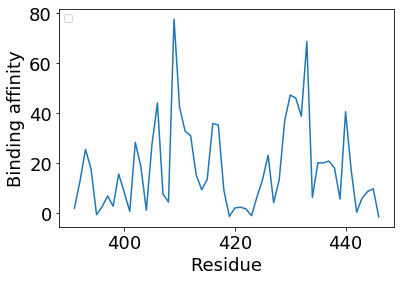

In [71]:
plt.plot(range(391,447), affinity)
plt.xlabel('Residue', size=18)
plt.ylabel('Binding affinity', size=18)
plt.tick_params(labelsize=18)
